In [1]:
%matplotlib widget
import torch
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('../data/day_length_weight.csv', dtype='float')
train_y = train.pop('day')
train_x = torch.tensor(train.to_numpy(), dtype=torch.float).reshape(-1,2)
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.float).reshape(-1,1)

In [2]:
class NonLinearRegressionModel:
    def __init__(self):
        self.W = torch.rand((2,1), requires_grad=True)
        self.b = torch.rand((1,1), requires_grad=True)

    def f(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        x = torch.nn.functional.mse_loss(self.f(x), y)
        return x

In [3]:
model = NonLinearRegressionModel()

optimizer = torch.optim.SGD([model.b, model.W], lr=0.00000075)
for epoch in range(10000):
    model.loss(train_x, train_y).backward() 
    optimizer.step() 
    optimizer.zero_grad()  

print("W = %s, b = %s, loss = %s" %(model.W, model.b, model.loss(train_x, train_y)))

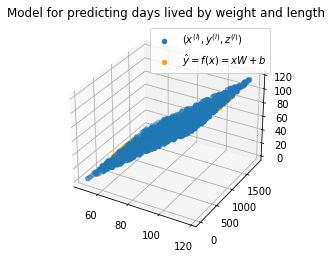

In [ ]:
xt =train_x.t()[0]
yt =train_x.t()[1]

fig = plt.figure('Linear regression 3d')
ax = fig.add_subplot(projection='3d', title="Model for predicting days lived by weight and length")
# Plot
x = torch.linspace(int(torch.min(xt).item()), int(torch.max(xt).item()), 1000) 
z = torch.linspace(int(torch.min(yt).item()), int(torch.max(xt).item()), 1000) 
ax.scatter(x.numpy(),  train_y.numpy(), z.numpy(),label='$(x^{(i)},y^{(i)}, z^{(i)})$')
ax.scatter(x.numpy(), model.f(train_x).detach().numpy(),z.numpy() , label='$\\hat y = f(x) = xW+b$', color="orange")
ax.legend()
plt.show()